<a href="https://colab.research.google.com/github/Adityasingh3008/YES-BANK-STOCK-CLOSING-PRICE-PREDICTION/blob/main/Individual_Notebook_YES_BANK_STOCK_CLOSING_PRICE_PREDICTION_(Capstone_Project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
# **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.** 

# **Lets Understand first What is Stock?**
**Stocks are a type of security that gives stockholders a share of ownership in a company. Stocks also are called "Equities". Units of stock are called "Shares". Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors portfolios.**

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Link the dataset path and read csv file
dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [4]:
# Loaded csv file
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
# Fetch first five rows by using head() method of dataframe
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# Fetch last five rows by using tail() method of dataframe
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
# Getting information about the datatypes and null values stored at each column by using "info()" method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
# Fetch first five rows of feature "Date" by using head() method of dataframe
dataset['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

* **From the above dataframe we can see that the 'Date' feature is of object data type, so we need to convert it in the date time format and also the format of the date is in MMMM-YY format and we also need to convert it to a proper date time format as YYYY-MM-DD.**

In [9]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))   

In [10]:
# Fetch first five rows by using head() method of dataframe after converting "Date" column into proper Date format
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


* **Now the 'Date' feature is converted into a proper datetime format.**

# **Checking Null Values**

In [11]:
# Checking Null Values In Our Dataset
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

* **We can see that there are no null values in our dataset.**

In [12]:
# Creating a copy of a dataframe
df = dataset.copy()

In [13]:
# Set the DataFrame index using existing columns.
df.set_index('Date',inplace=True)

In [14]:
# Fetch first five rows by using head() method of dataframe after set_index method()
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


* **We created a copy of dataframe so that if we apply some conditions or made changes in our dataset it won't affect the original dataset.**

# **Checking Duplicate Values**

In [15]:
#Taking a look at duplicate values
len(df[df.duplicated()])

0

* **As there were no null values there are no duplicate values as well.**

In [16]:
# Analyse the data by looking into various columns i.e. max. , min. , mean etc.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


* **We have used describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.**
* **We have also used a transpose method to convert rows into columns and vice versa.**

In [17]:
# Check the various attributes of data like shape(rows and columns), null values,unique values.print ("Rows : " , dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n " ,dataset.columns.tolist())
print ("\nMissing values:", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n", dataset.nunique())

Columns  :  5

Features : 
  ['Date', 'Open', 'High', 'Low', 'Close']

Missing values: 0

Unique values :  
 Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


**Conclusion Drawn**:-

* **From the various attributes of data like shape(rows and columns) , null values and unique values, we get to know that there are 5 columns and there are no missing value in our data and each columns have their respective unique values.**

# **Features/Columns in respective dataset**
 * **Date:-** Date denotes the date of investment( in our data date contains month and year for a particular price)
 * **Open:-** Open means the price at which a stock started trading.
 * **High:-** The high is the highest price at which a stock traded during a period.
 * **Low:-** The low is the minimum price at which a stock traded during a period.
 * **Close:-** The closing price refers to a stock's trading price closed at the end of a trading day.


# **As now we have converted our 'Date' object feature into proper datetime format(There are no categorical features in our dataset) we will take a look at numerical features in our dataset now**

In [18]:
# Fetch all the values of numeric features in our dataset
# Fetch first five rows by using head() method of dataframe
dataset_num = dataset.select_dtypes(exclude=['bool','object'])
dataset_num.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [19]:
# Create a new variable and store the column in that variable
numeric_features = df.columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# **Data Distribution And Mean and Median Of Each Single Independent variable**

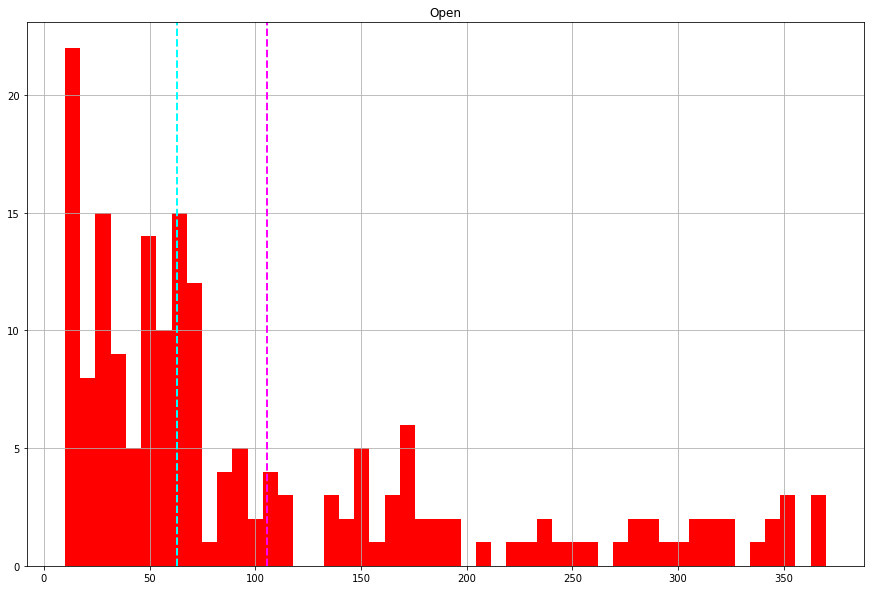

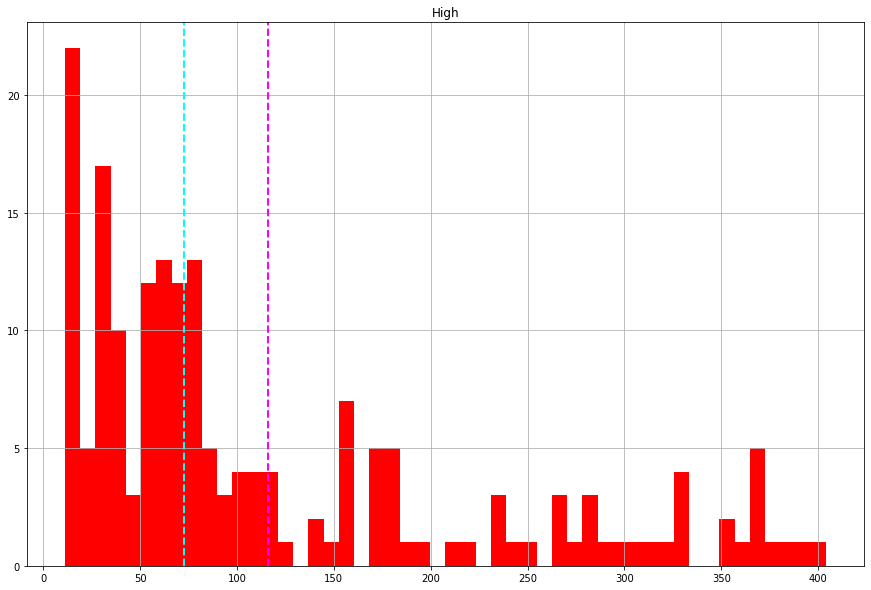

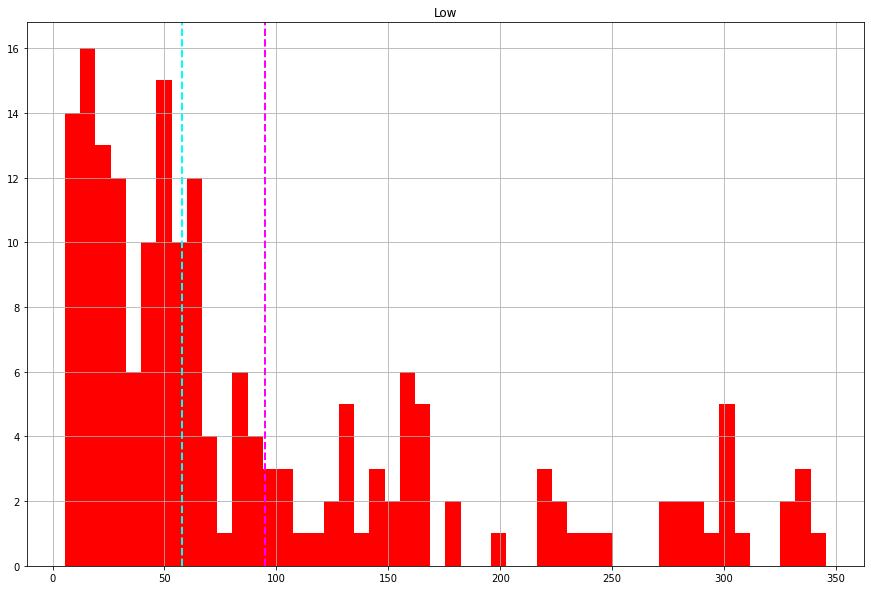

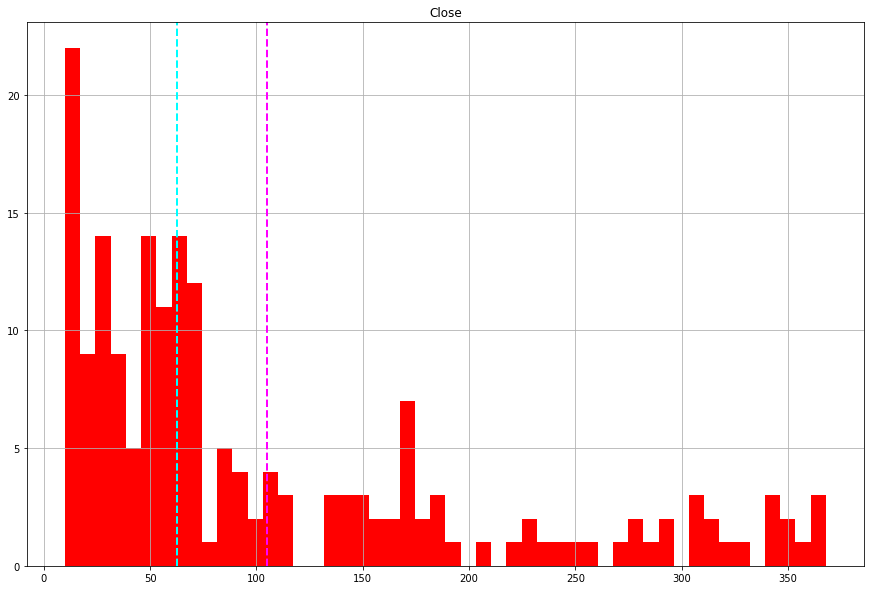

In [20]:
# Plot hist plot for all the numeric features in dataset
for i in numeric_features[:]:
  fig = plt.figure(figsize=(15,10))
  ax = fig.gca()
  num_features = dataset[i]
  label = dataset['Close']
  num_features.hist(bins = 50,ax = ax,color = 'red')
  ax.axvline(num_features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(num_features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

**Conclusion Drawn:-**
* **From the above hist plot we can say that mean is less than median as it is positively skewed and outlier are also present so we need to convert it to a normal distribution curve so that it will result in mean=median and outliers will also be removed from our feature.** 
* **We have used fig.gca() [Get Current Axes] method to get axes.**
* **We have also used vline method to get vertical lines which is depicted by 'Cyan' color for median and 'Magenta' color for mean.**

# **Let Us Explore The Dataset Now : EDA(Exploratory Data Analysis)**

# **Q.1 Plot Distribution Plot For Dependent Feature "Close"?**

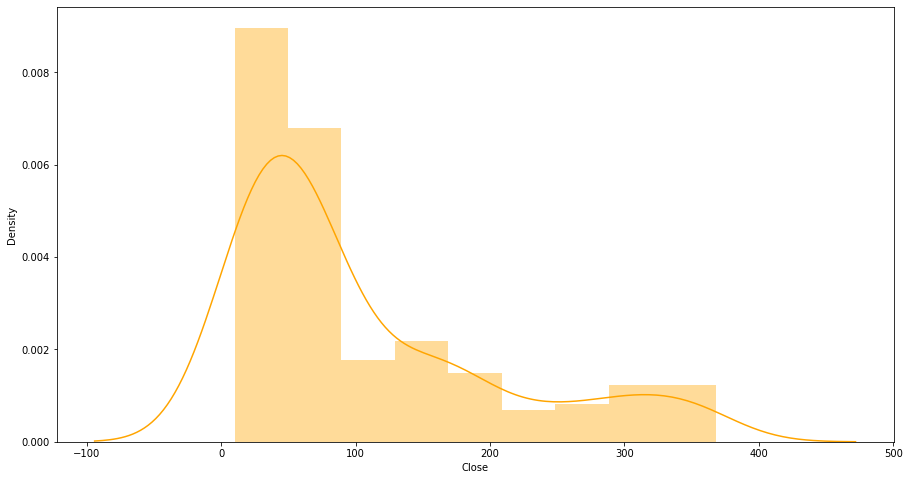

In [21]:
# Distribution Plot For Dependent Feature "Close"
plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='orange')
plt.show()

 **Conclusion Drawn:-**
 * **From the above distribution plot for the feature "Close" we can see that the density was slightly upward than 0.006 between the Close price in the range 0 to 100 [Approx. 50 to 55].**
 * **We can Also Conclude that It is Positively Skewed for the Dependent Feature "Close".**
 * **We can also see that At the density 0.001 the closing price was between [Approx. 200 to 250]. And the density takes a gradual decrease after 350.**

# **Q.2 Plot Boxplot For The Dependent Feature "Close" To Detect Outliers?**

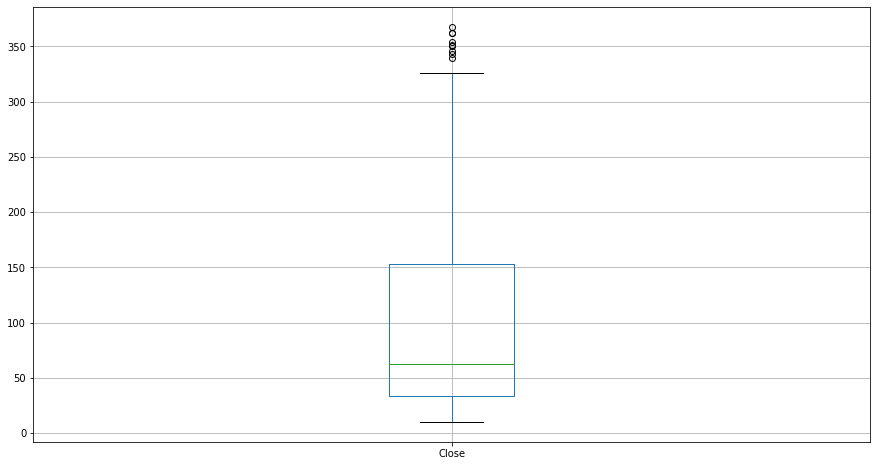

In [22]:
# Boxplot For Dependent Feature "Close"
plt.figure(figsize=(15,8))
dataset.boxplot('Close')
plt.show()

**Conclusion Drawn:-**
* **From the above box plot we can see that as the price increases after 325 it becomes an anomaly[Outlier] for feature "Close".**
* **We can also say that:-**
 * **40 is the mean lower quartile** 
  * **60 is the middle quartile/Median** 
  * **150 is the upper quartile**

# **Q.3 Plot Normal Distribution For The Dependent Feature "Close"?**

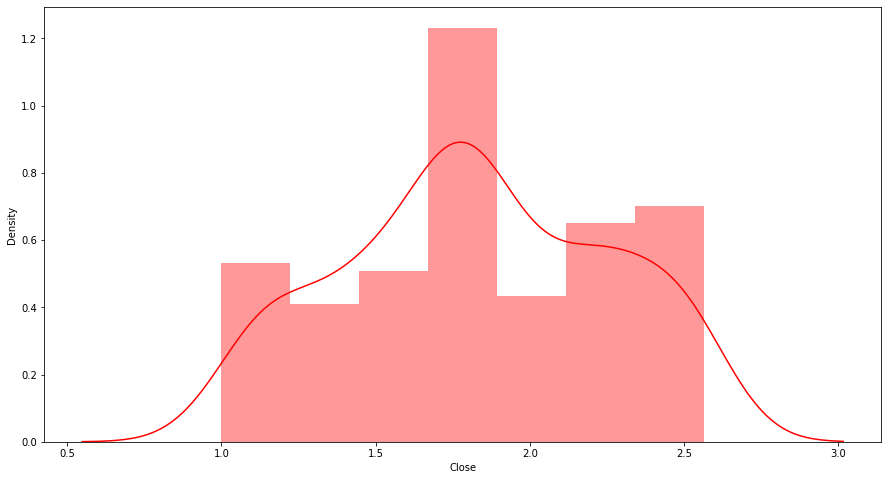

In [23]:
# Normal Distribution For Dependent Feature "Close"
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Close']),color='Red')
plt.show()

**Conclusion Drawn:-**
* **From the above distplot we can say that it's not a perfectly symmetrical bell shaped curve but it is slightly looks similar to the Normal Distribution Curve.**
* **We have used np.log10() method because it is a mathematical library function used to get the natural logarithm of any object or an array with the base 10. The np. log10() function accepts two arguments and returns the array of natural logarithms of the given array elements where the base is 10.**

# **Q.4 Plot Box Plot Of the Normal Distribution Curve For The Dependent Feature "Close" To See Outliers?**

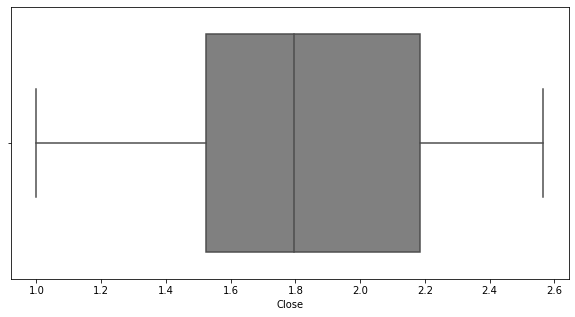

In [24]:
# Boxplot Of The Normal Distribution Curve For The Dependent Feature "Close"
plt.figure(figsize=(10,5))
sns.boxplot(np.log10(dataset['Close']),color='grey')
plt.show()

**Conclusion Drawn:-**
* **From the above boxplot we can see that after applying np.log10() method with feature "Close" we get a normal distribution curve which helps to remove the outliers from the column "Close".**
* **From the boxplot we can also conclude that:-**
    
    * **Lower Quartile (Q1) :- 1.5**
    
    * **Median (Q2) :- 1.8**

    * **Upper Quartile (Q3) :- 2.2**



# **Q.5 Plot Line Plot For Numerical Features In Our Dataset?**

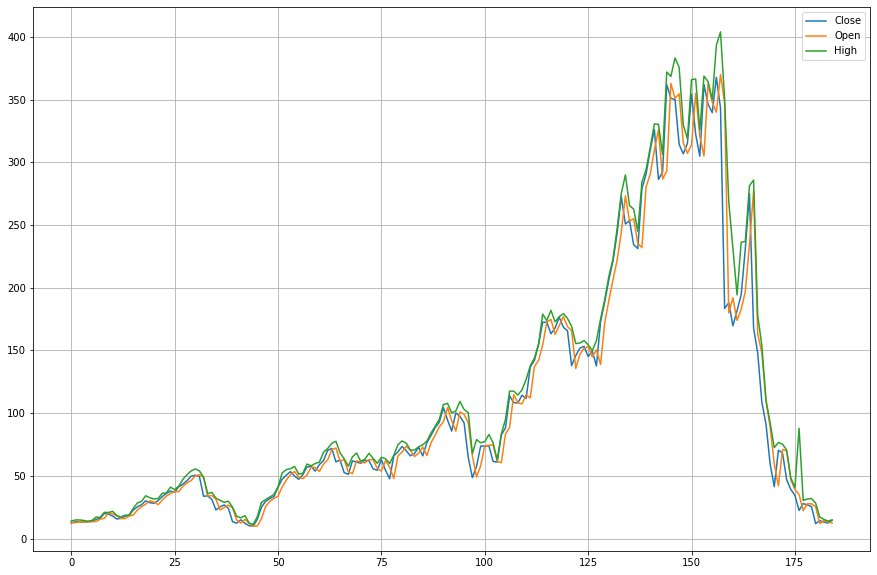

In [25]:
# Plot the Line Plot
plt.figure(figsize=(15,10))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

**Conclusion Drawn:-**
* **From the above line plot we see that before the 2018 fraud case involving Rana Kapoor the prices of shares were very high and due to this fraudalent activity the market gets very impacted which resulted in low prices of shares after 2018.**
* **We can also conclude that in the year 2020 the prices of share were below 100[Approx. in the range of 80 to 90].**
* **Before 2018 the highest price of was at the peak level of 400 After 2018 Fraud case affected the market very badly which resulted in Gradual decrease in the price of share.**

# **Q.6 Plot Distribution Plot For Independent Features "Open" , "High" , "Low"?**

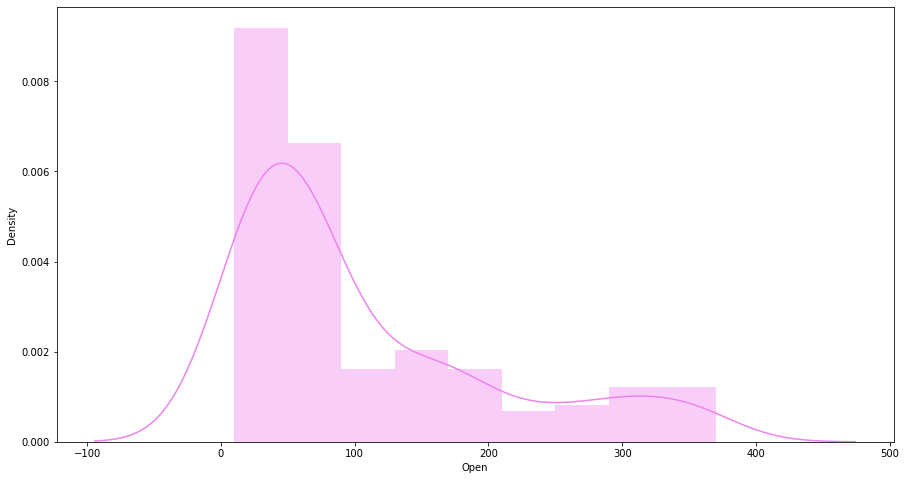

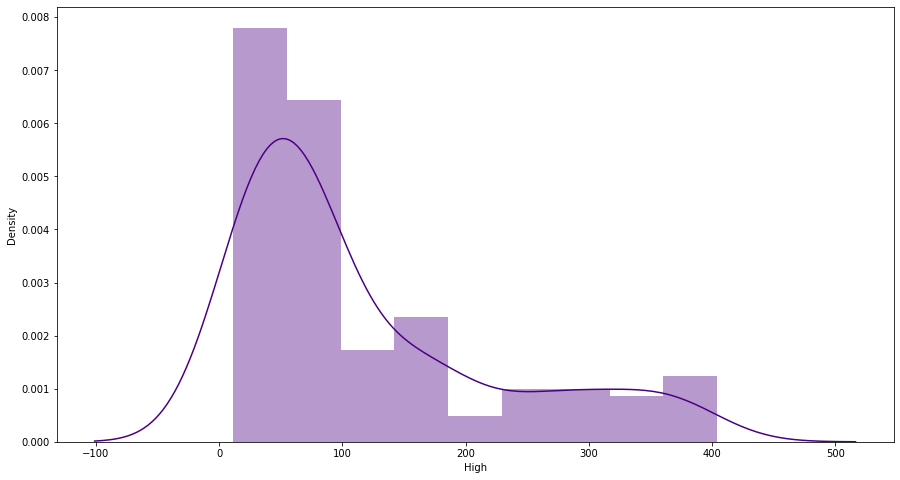

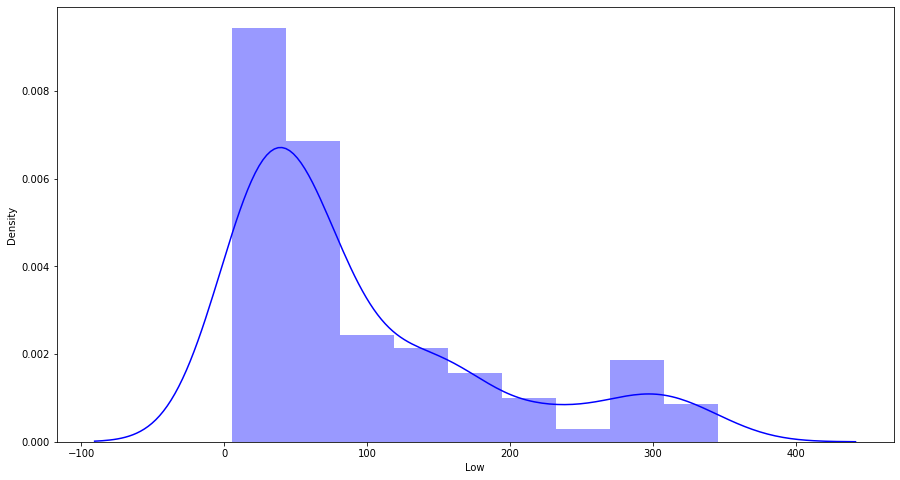

In [26]:
# Distribution Plot For Independent Feature "Open" , "High" , "Low"
plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='violet')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='indigo')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

**Conclusion Drawn:-**
* **From the above distribution plot for the independent features "Open" , "High" , "Low" we can see that the graph is positively skewed to each other.**
* **We can also conclude that when the price exceeds by 200 there is so much variation for all the independent features.**


# **Q.7 Plot Boxplot For The Independent Features "Open" , "High" , "Low" To Detect Outliers?**

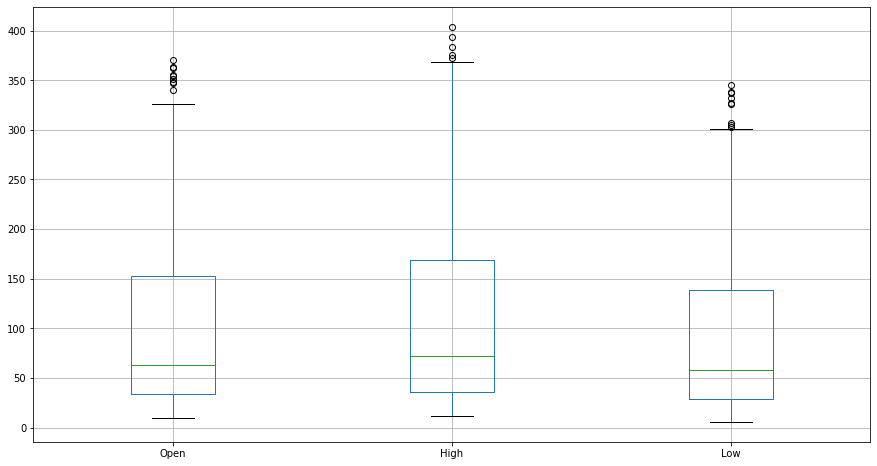

In [27]:
# Boxplot For The Independent Features "Open" , "High" , "Low"
plt.figure(figsize=(15,8))
dataset.boxplot(['Open','High','Low'])
plt.show()

**Conclusion Drawn:-**
* **From the above boxplot of the independent features "Open" , "High" , "Low" we can see that for the feature "Open" as the value exceeds by we have observed an outlier[Anomaly] , similarly for the features "High" and "Low" as the price exceed by 350 [For the feature "High"] and the price above 300 [For the feature "Low"]  we have observed an outlier present in the boxplot.**
* **We can also conclude that there is not so much difference between the Median[Q2] for the independent features "Open" , "High" , "Low".**  

# **Q.8 Plot Normal Distribution For The Independent Features "Open" , "High" , "Low"?**

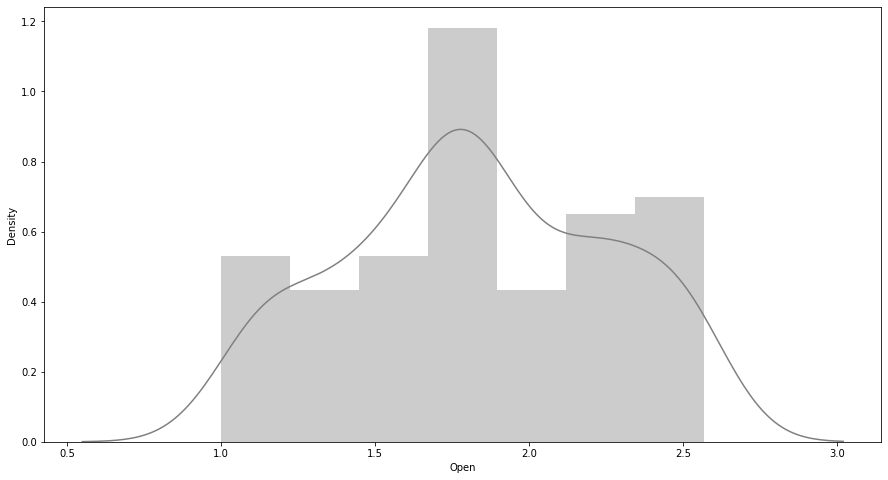

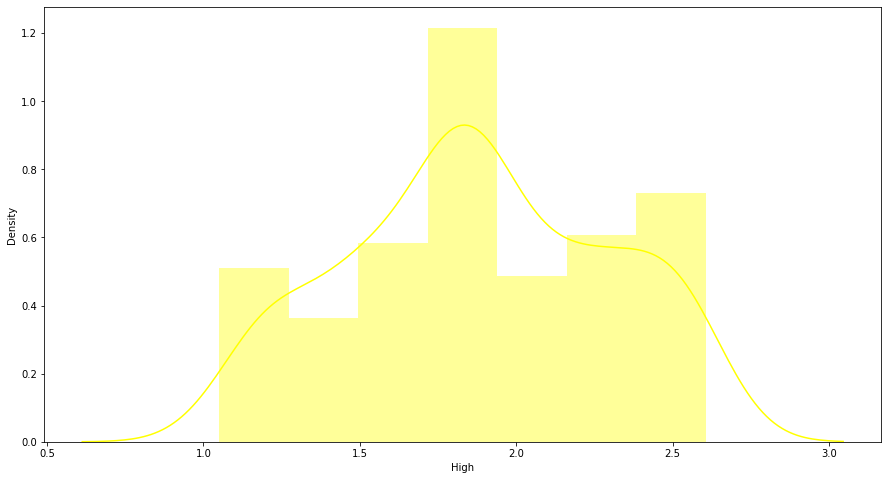

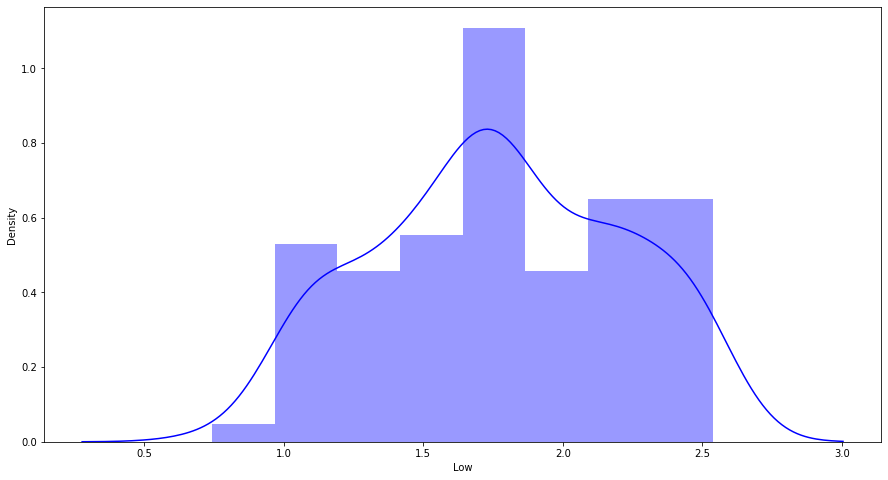

In [28]:
# Normal Distribution For The Independent Features "Open","High","Low"
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Open']), color='grey')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='yellow')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')

**Conclusion Drawn:-**
* **From the above distplot we can say that it's not a perfectly symmetrical bell shaped curve but it is slightly looks similar to the Normal Distribution Curve.**
* **We have used np.log10() method because it is a mathematical library function used to get the natural logarithm of any object or an array with the base 10. The np. log10() function accepts two arguments and returns the array of natural logarithms of the given array elements where the base is 10.**

# **Q.9 Plot Boxplot Of The Normal Distribution Curve For The Independent Features "Open" , "High" , "Low"?**

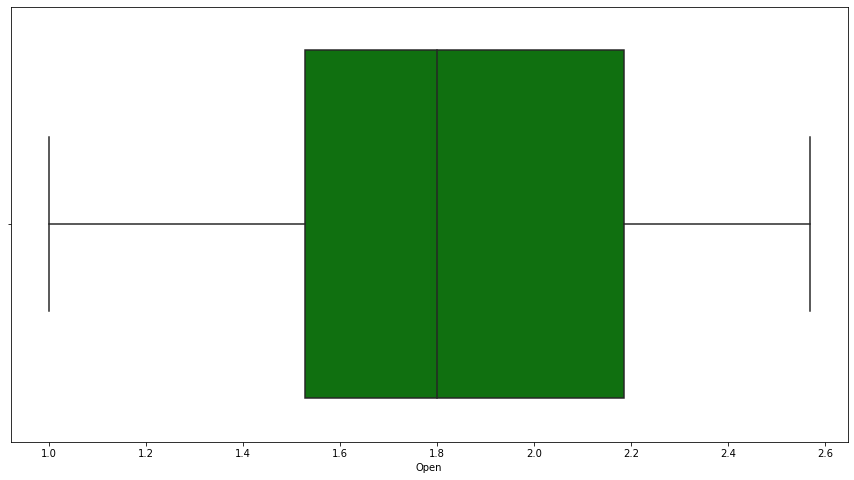

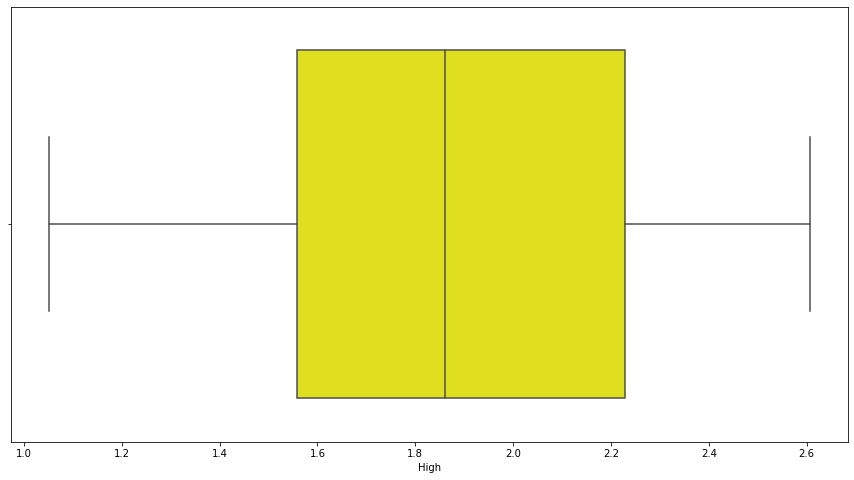

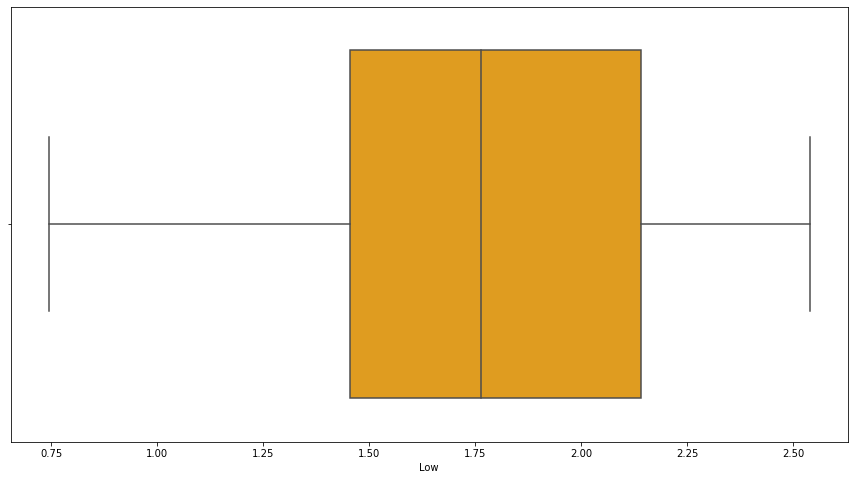

In [29]:
# Boxplot Of The Normal Distribution Curve For The Independent Features "Open","High","Low"

plt.figure(figsize=(15,8))
sns.boxplot(np.log10(dataset['Open']), color='green')

plt.figure(figsize=(15,8))
sns.boxplot(np.log10(dataset['High']), color='yellow')

plt.figure(figsize=(15,8))
sns.boxplot(np.log10(dataset['Low']), color='orange')


**Conclusion Drawn:-**
* **From the above boxplot we can see that after applying np.log10() method with independent features "Open" , "High" , "Low" we get a normal distribution curve which helps to remove the outliers from the column "Open" , "High" , "Low".**
* **From the boxplot we can also conclude that:-**

   * **For Feature "Open" :-**
   
    * **Lower Quartile (Q1) :- 1.52**
    
    * **Median (Q2) :- 1.8**

    * **Upper Quartile (Q3) :- 2.2**

  * **For Feature "High" :-**
   
    * **Lower Quartile (Q1) :- 1.59**
    
    * **Median (Q2) :- 1.82**

    * **Upper Quartile (Q3) :- 2.2**
  
  * **For Feature "Low" :-**
    * **Lower Quartile (Q1) :- 1.48**
    
    * **Median (Q2) :- 1.75**

    * **Upper Quartile (Q3) :- 2.15**

# **Q.10 Correlation Between The Variables?**

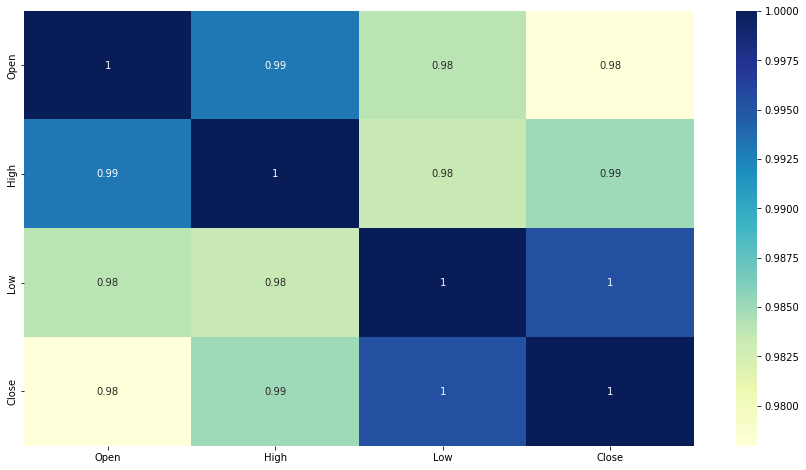

In [30]:
# Find Correlation Between The Variables In Our Dataset
corr = dataset.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'YlGnBu')

 **Conclusion Drawn:-**
 * **Each square shows the correlation between the variables on each axis. Values closer to zero means there is no linear trend between the two variables. value close to 1 the correlation is the more positively correlated.The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.**
 * **Squares containing a light blue color having the value of [1] are least located in the graph.**

# **Finding Correlation Between Variables**

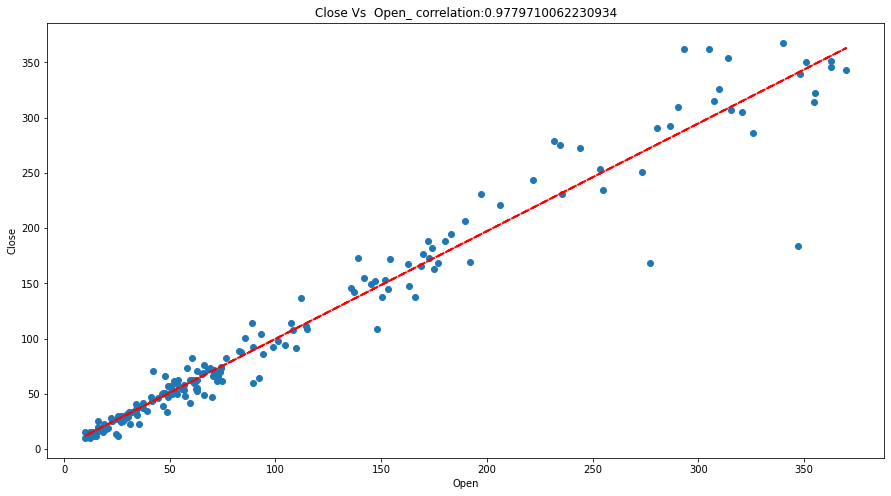

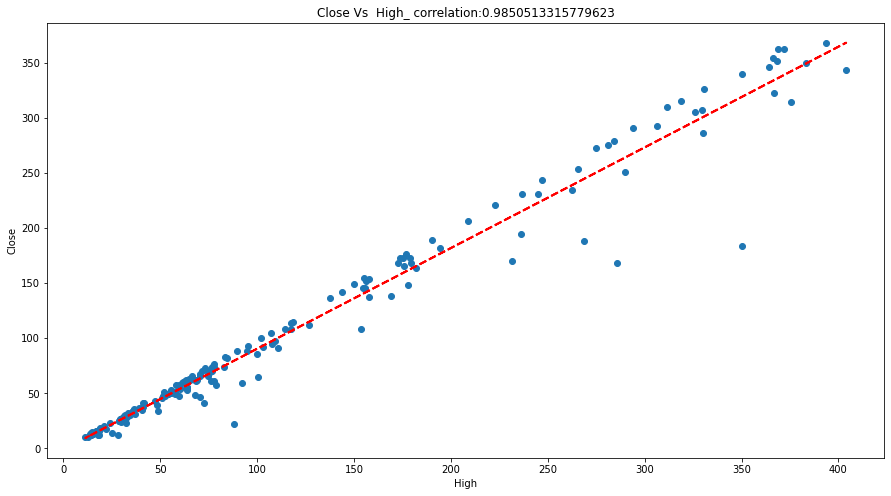

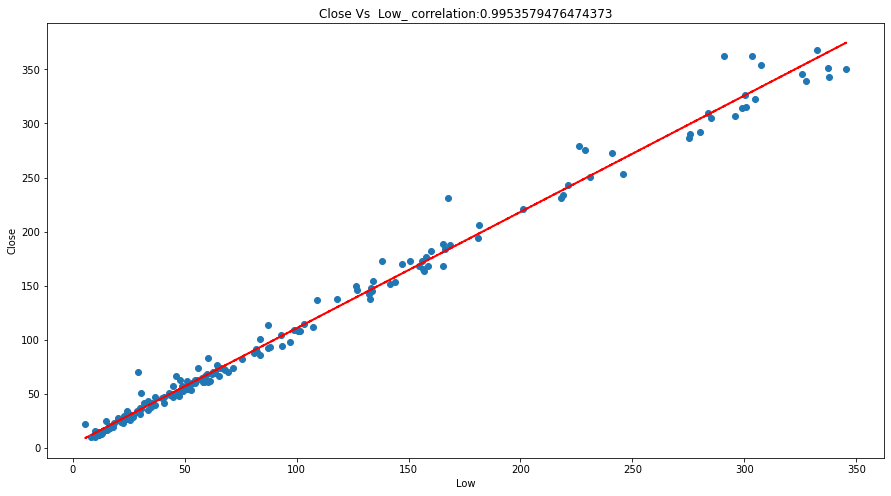

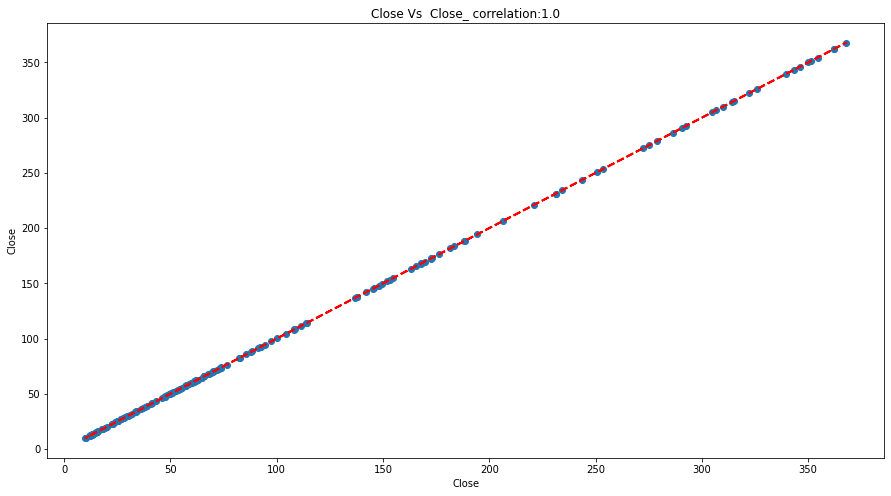

In [31]:
# Scatter Plot For Finding The Correlation Between Variables
for col in numeric_features:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Close Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

**Conclusion Drawn:-**
* **From the above scatter plot we can see that the respective feature names are mapped on X-axis whereas the feature "Close" is located on the Y-axis.**
* **We have used np.polyfit() method to help us by finding the least square polynomial fit. This means finding the best fitting curve to a given set of points by minimizing the sum of squares. It takes 3 different inputs from the user , namely X, Y, and the polynomial degree. Here X and Y represent the values that we want to fit on the 2 axes.**
* **We have also used numpy.poly1d() method which allows us to define a polynomial function. It therefore makes it straightforward to use natural operations on polynomials. It is a convenience class, used to encapsulate natural operations on polynomials so that said operations may take on their customary form in code.**
* **Correlation Values between the variables is mentioned below:-**

  **Close Vs Open_correlation :-0.9779710062230934**

  **Close Vs High_correlation :-0.9850513315779623**

  **Close Vs Low_correlation :-0.9953579476474373**

  **Close Vs Close_correlation :-1.0**




# **Finding Multicollinearity Between Variables**

In [32]:
# Multicollinearity Between Variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [33]:
# Calculate Variance Inflation Factor For The Features "Open" , "High" , "Low" 
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* **We have used Variance Inflation Factor(VIF) to measure the severity(Intensity) of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.**

<Figure size 1080x576 with 0 Axes>

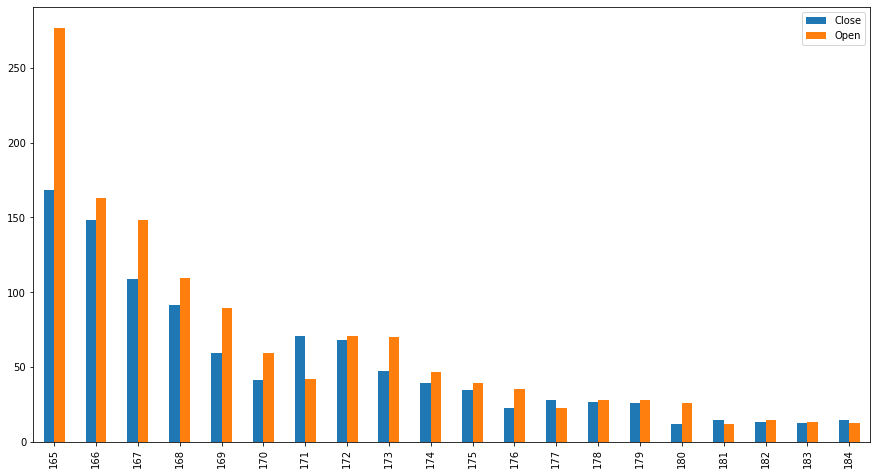

In [34]:
# Plot Barplot To Check The Correlaton Between One Dependent Variable "Close" And One Independent Variable "Open"
plt.figure(figsize=(15,8))
dataset[['Close','Open']].tail(20).plot(kind='bar',figsize=(15,8))

**Conclusion Drawn:-**
* **From the above bar graph we can say that the prices of shares for "Open" feature is higher than the feature "Close" in most cases.**

* **We can also Say that this graph is Positively Skewed.**

* **We can also say that the "Open" column is represented by Orange Color Whereas "Close" column is represented by Blue Color.**

* **From the Above bar graph between One Dependent Feature "Close" and One Independent Feature "Open" we can conclude that:-**
  
  * **For Observation(165) :- The Price of share for "Open" Column[Independent Feature] is very higher than the "Close" Column[Dependent Feature].**
 
  * **For Observation(171,177,181,184) :- The Price of share for "Close" Column[Dependent Feature] is higher than the "Open" column[Independent Feature].**
  
  * **For Observation(172,178,179,181,182,183,184) :- There is not so much difference between the "Open" Price[Independent Feature] And "Close" Price[Dependent Feature].**



# **So Now As Our EDA Part Is Done We Will Apply Linear Regression Model Before That We Will Split Our Data Into Training And Testing Set**

**Normalization**

In [35]:
# Splitting our data into Dependent and Independent Variables
X = dataset.drop(columns=['Date']).apply(zscore)
y = np.log10(dataset['Close'])

**Train_Test_Split**

In [36]:
# Create Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

In [37]:
# Independent Variable Training Set(Rows And Columns)
X_train.shape

(148, 4)

In [38]:
# Independent Variable Testing Set(Rows And Columns)
X_test.shape

(37, 4)

In [39]:
# Dependent Variable Training Set Rows
y_train.shape

(148,)

In [40]:
# Dependent Variable Test Set Rows
y_test.shape

(37,)

# **Now We Have Splitted Our Data Into Train Set And Test Set So Lets Apply Linear Regression Model.**

In [41]:
# Make Instance(Object)
# Fit Independent Variable Train Set And Dependent Variable Train Set
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [42]:
# Find Accuracy Score
reg.score(X_train,y_train)

0.8228343160689795

In [43]:
# Independent Variable Testing Set Values
X_test.values

array([[-0.72649604, -0.75726135, -0.73030649, -0.72363043],
       [ 0.48126472,  0.36225579,  0.42608639,  0.40710723],
       [-0.36041574, -0.43004399, -0.59631001, -0.59252304],
       [ 0.32002714,  0.2622046 ,  0.41212613,  0.3750678 ],
       [-0.46790747, -0.44532042, -0.39504049, -0.43720808],
       [-0.79241078, -0.77272637, -0.7469049 , -0.76329829],
       [ 1.31686075,  1.21547269,  1.35537777,  1.28213971],
       [-0.91308545, -0.93482627, -0.8744159 , -0.90610262],
       [-0.93346831, -0.9586839 , -0.90079749, -0.93061533],
       [ 0.78396547,  1.1334326 ,  0.94756242,  0.90621038],
       [ 2.18186489,  1.9774082 ,  2.09021488,  2.03115042],
       [ 0.04115711, -0.0519052 , -0.14507496, -0.14142818],
       [ 0.468386  ,  0.39469463,  0.53952721,  0.4891892 ],
       [-0.45776674, -0.49709054, -0.44131819, -0.43558068],
       [ 2.45870678,  2.20655465,  2.55464073,  2.38409273],
       [ 1.30874817,  1.55777787,  1.47134683,  1.72753867],
       [-0.35128909, -0.

In [44]:
# Dependent Variable Testing Set Values
y_test.values

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

In [45]:
# Independent Variable Training Set Values
X_train.values

array([[ 0.37052797,  0.36678214,  0.42927416,  0.50210669],
       [-0.90598694, -0.89729529, -0.86760066, -0.86582448],
       [-0.13326342, -0.14809013, -0.40933052, -0.41137311],
       [-0.46689339, -0.4107127 , -0.59356193, -0.6484649 ],
       [-0.96845382, -0.92973413, -0.93443401, -0.91291735],
       [-0.5713429 , -0.35045568, -0.55124147, -0.48521637],
       [-0.58553992, -0.60393125, -0.52376065, -0.55163462],
       [-0.70540333, -0.7078487 , -0.65874643, -0.6842677 ],
       [-0.56333172, -0.57092662, -0.71128976, -0.55600826],
       [-0.81066409, -0.82798556, -0.92168291, -0.94851672],
       [-0.11703826, -0.1504476 , -0.12671777, -0.19828546],
       [-0.92525432, -0.950197  , -0.90354557, -0.93631122],
       [-0.67376425, -0.71105486, -0.67435554, -0.71864651],
       [-0.76401674, -0.78743701, -0.74910337, -0.7788603 ],
       [ 2.06930281,  2.0224831 ,  2.25619903,  2.24718773],
       [-0.37055647, -0.36045136, -0.31600565, -0.32288325],
       [ 2.11392201,  2.

In [46]:
# Dependent Variable Training Set Values
y_train.values

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [47]:
# Dependent Variable Testing Set Predicted Values
# Dependent Variable Training Set Predicted Values
y_test_pred= reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [48]:
# Dependent Variable Testing Set Predicted Values
y_test_pred

array([1.54811244, 1.99624906, 1.62823028, 1.95511079, 1.62956537,
       1.51421748, 2.30799671, 1.45703587, 1.44907152, 2.11836116,
       2.63088895, 1.80167436, 1.99887714, 1.65929796, 2.7121091 ,
       2.55704902, 1.6730226 , 1.50048839, 2.59330624, 1.59782792,
       1.44125064, 1.82223218, 2.02210755, 1.63067415, 2.27996611,
       1.80700034, 2.43067465, 1.44757453, 1.82827413, 1.61760031,
       2.68596895, 2.9441976 , 1.71671213, 2.03616452, 1.57088141,
       1.58366757, 2.3547348 ])

In [49]:
# Dependent Variable Training Set Predicted Values
y_train_pred

array([2.0436946 , 1.4822968 , 1.69699838, 1.56171621, 1.46880612,
       1.63841827, 1.59464456, 1.54374953, 1.68185578, 1.45871394,
       1.72698926, 1.44699003, 1.53187918, 1.51051922, 2.68841796,
       1.69034613, 2.84786956, 1.50164459, 1.60766783, 1.61144716,
       2.69821094, 1.44695884, 1.89942919, 1.53389491, 1.85463222,
       1.6805384 , 2.78973093, 1.66713836, 1.7520118 , 2.00031389,
       1.6003722 , 1.75217825, 1.83382778, 2.0534243 , 1.45485024,
       1.82034391, 1.67780572, 1.44936017, 1.60058739, 1.67310266,
       2.1738949 , 1.43774489, 1.47435984, 1.81204374, 1.63439714,
       1.50115792, 1.88885552, 2.12657271, 1.99017802, 1.6221973 ,
       2.67598242, 1.52488496, 1.57829232, 1.99148087, 1.76515959,
       1.64595632, 2.24698134, 1.46497024, 1.61840444, 1.53748632,
       1.5445998 , 1.64848931, 1.46812435, 2.51448875, 1.55247584,
       1.45796966, 2.03613651, 1.52396613, 1.49263336, 1.70430067,
       1.76993086, 1.60993949, 1.71125152, 1.61662746, 1.44606

In [50]:
# Find Y-Intercept Value
reg.intercept_

1.826638657345751

In [51]:
# Find Coefficient Value
reg.coef_

array([ 0.20070985, -0.08739353, -0.47423887,  0.75346579])

# **Evaluation Metrics**

In [52]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.032415999175982736
RMSE : 0.1800444366704585
MAE : 0.1520834876688823
R2 : 0.8259845762484241


In [53]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.031109173905047718
RMSE : 0.17637792918913556
MAE : 0.1522383610228153
R2 : 0.8228343160689795


# **Linear Regression Plot For Actual Values And Predicted Values**

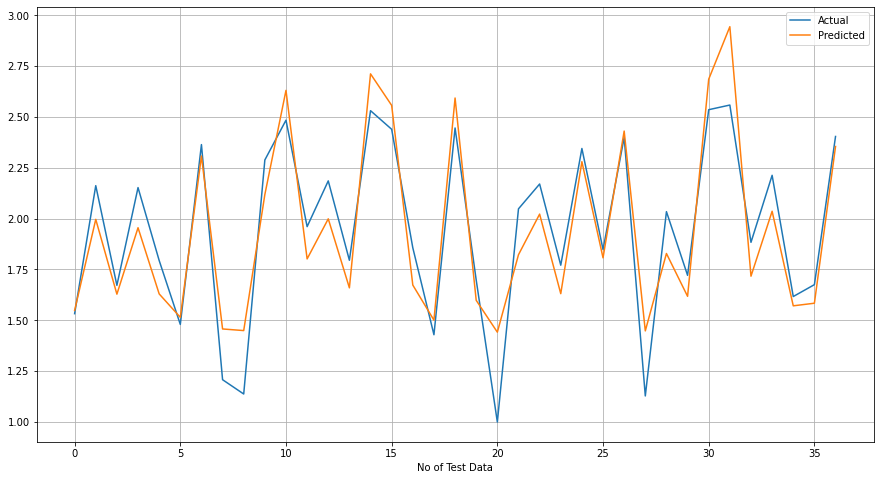

In [54]:
# Linear Regression Plot
plt.figure(figsize=(15,8))
plt.plot((np.array(y_test)))
plt.plot((y_test_pred))
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Conclusion Drawn:-**
* **From the above Linear Regression graph we can see that the No of Test Data is on the X-axis where as the predicted values is being mapped on Y-axis.**

* **In the Graph Actual Value is indicated by Blue color while the Predicted Value is indicated by Orange color.**

* **When No of Test Data = 30 we can see that that the predicted value [More than 2.75 [Approx.2.90] ] is much more higher than the actual value[Approx. 2.52] And in some cases Actual Value is Greater than Predicted Value.**


* **When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the predicted value is less than the actual value.** 

* **When No Of Test Data = 6 , 24, 26 there is less difference between the actual value and predicted value.**  

# **Lasso Regression**

In [55]:
# import the model in our dataset
from sklearn.linear_model import Lasso

In [56]:
# Make Instance (Object) 
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)

In [57]:
# Find Accuracy Score
lasso.score(X_train,y_train)

0.8172421021107302

In [58]:
# Dependent Variable Lasso Regression Predicted Value
y_lasso_pred = lasso.predict(X_test)

In [59]:
# Dependent Variable Lasso Regression Predicted Value
y_lasso_pred

array([1.54343189, 1.98045075, 1.60988239, 1.96260633, 1.65639812,
       1.53000369, 2.31759245, 1.4731557 , 1.4637147 , 2.19549151,
       2.60870479, 1.77875257, 2.00827181, 1.65276039, 2.73549858,
       2.48184784, 1.69190097, 1.51568925, 2.49677756, 1.609179  ,
       1.44964215, 1.85477456, 2.00668897, 1.64031603, 2.26987389,
       1.68798297, 2.41275166, 1.46235476, 1.83452561, 1.62226815,
       2.78800352, 2.82190639, 1.70749265, 2.05768427, 1.57073762,
       1.59670334, 2.40263244])

# **Evaluation Metrics**

In [60]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03094541507466778
RMSE : 0.1759130895489809
MAE : 0.1464834557725023
R2 : 0.8338789593326343


# **Lasso Regression Plot For Actual Values And Predicted Values**

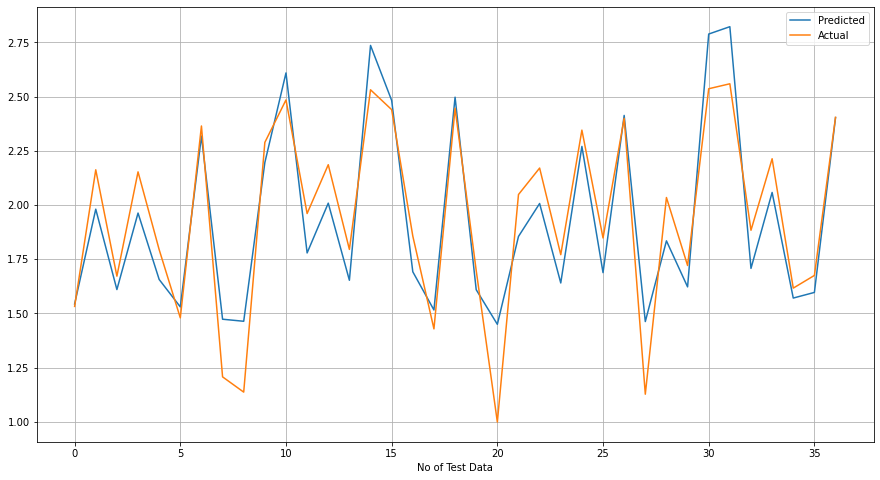

In [61]:
# Lasso Regression Plot
plt.figure(figsize=(15,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Conclusion Drawn:-**
* **From the above Lasso Regression graph we can see that the No of Test Data is on the X-axis where as the predicted values is being mapped on Y-axis.**

* **In the Graph Predicted Value is indicated by Blue Color while the Actual Value is indicated by Orange color.**

* **When No of Test Data = 30 we can see that that the Predicted Value[More than 2.75] is much more higher than the Actual Value[Approx. 2.52]. And in some cases Actual Value is higher than Predicted Value.**

* **When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the Predicted Value is less than the Actual Value.** 

* **When No Of Test Data = 6 , 24, 26 there is less difference between the Actual Value and Predicted Value.**  

# **Ridge Regression**

In [62]:
# Importing The Library
from sklearn.linear_model import Ridge

In [63]:
# Make Instance (Object)
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [64]:
# Find Accuracy Score
ridge.score(X_train, y_train)

0.8222539088780518

In [65]:
# Dependent Variable Ridge Regression Predicted Value
y_ridge_pred = ridge.predict(X_test)

In [66]:
# Dependent Variable Ridge Regression Predicted Value
y_ridge_pred

array([1.5447854 , 1.98957884, 1.62255541, 1.9558829 , 1.63778112,
       1.51838633, 2.31066724, 1.46026657, 1.45175371, 2.1521688 ,
       2.62316114, 1.79396007, 2.00041028, 1.65532872, 2.71720858,
       2.53719668, 1.67774618, 1.50388213, 2.56736279, 1.60046818,
       1.44205672, 1.83332666, 2.0196753 , 1.63262628, 2.27618967,
       1.77237594, 2.42818499, 1.45021254, 1.8291578 , 1.61792658,
       2.72606943, 2.91409305, 1.71310394, 2.04312154, 1.56918682,
       1.5862611 , 2.36968917])

# **Evaluation Metrics**

In [67]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03167722514057193
RMSE : 0.1779809684785762
MAE : 0.15072442456311896
R2 : 0.8299504597657189


# **Ridge Regression Plot For Actual Values And Predicted Values**

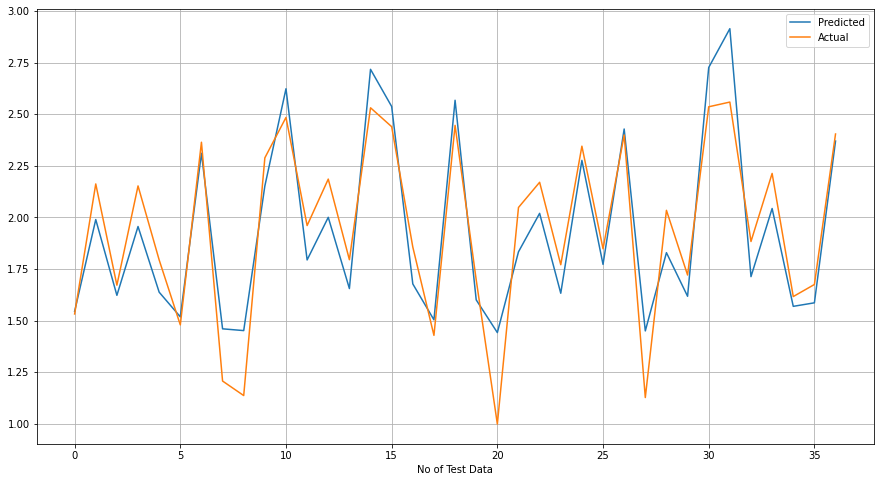

In [68]:
# Ridge Regression Plot
plt.figure(figsize=(15,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

 **Conclusion Drawn:-**
 * **From the above Ridge Regression graph we can see that the No of Test Data is on the X-axis where as the predicted values are being mapped on Y-axis.**
 
 * **In the Graph Predicted Value is indicated by Blue Color while the Actual Value is indicated by Orange Color.**

* **When No of Test Data = 30 we can see that that the Predicted Value [More than 2.75 [Approx.2.90] ] is much more higher than the Actual Value[Approx. 2.52] And in some cases Actual Value is Higher than Predicted Value.**

* **When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the Predicted Value is less than the Actual Value.** 

* **When No Of Test Data = 6 , 19 , 24, 26 there is less difference between the Actual Value and Predicted Value.**  

# **ElasticNet Regression**

In [69]:
# Importing The Library
from sklearn.linear_model import ElasticNet

In [70]:
# Make Instance (Object)
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [71]:
# Find Accuracy Score
elastic.score(X_train,y_train)

0.7948279893430594

In [72]:
# Dependent Variable ElasticNet Regression Predicted Value
y_elastic_pred = elastic.predict(X_test)

In [73]:
# Dependent Variable ElasticNet Regression Predicted Value
y_elastic_pred

array([1.57805108, 1.95943911, 1.64979062, 1.93783402, 1.67733698,
       1.56697119, 2.25069927, 1.5201448 , 1.51212477, 2.13821445,
       2.50620803, 1.79159388, 1.98000732, 1.67078566, 2.61766585,
       2.34394159, 1.70873571, 1.5555551 , 2.34828422, 1.63962742,
       1.49918055, 1.85310647, 1.98559872, 1.6593918 , 2.19237275,
       1.66189329, 2.34061281, 1.51113994, 1.83075871, 1.65504184,
       2.68275276, 2.60644521, 1.71073478, 2.03341955, 1.59931483,
       1.62785948, 2.32646027])

# **Evaluation Metrics:-**

In [74]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03303664779944622
RMSE : 0.18175986300458696
MAE : 0.1487547868674353
R2 : 0.8226528130463553


# **ElasticNet Regression Plot For Actual Values And Predicted Values**

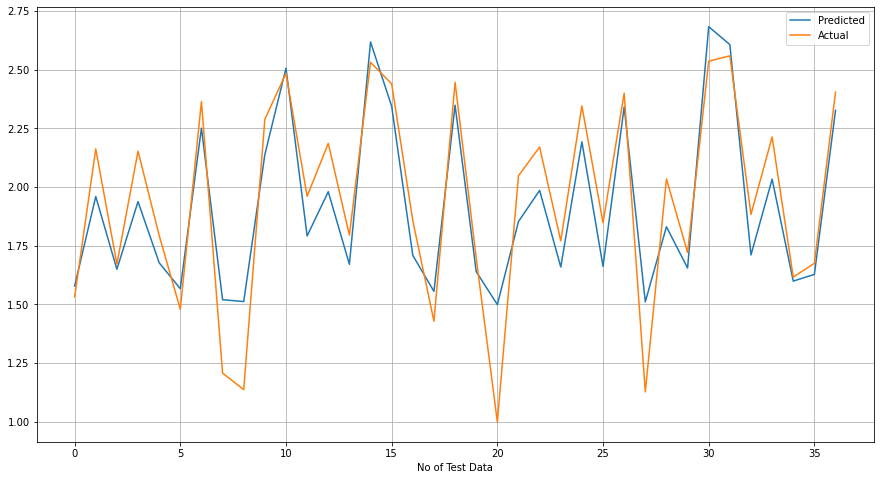

In [75]:
# ElasticNet Regression Plot
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Conclusion Drawn:-**
 * **From the above ElasticNet Regression Graph we can see that the No of Test Data is on the X-axis where as the predicted values are being mapped on Y-axis.**
 
 * **In the Graph Predicted Value is indicated by Blue Color while the Actual Value is indicated by Orange Color.**
 
 * **When No of Test Data = 30 we can see that that the Predicted Value[Approx. 2.70] is much more higher than the Actual Value[Approx. 2.52].  And in some cases Actual Value is Higher than Predicted Value.**
 
 * **When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the Predicted Value is less than the Actual Value.**
 
 * **When No Of Test Data = 6 , 10 , 17 , 26 there is less difference between the Actual Value and Predicted Value.** 

# **Insights:-**
* **Output Feature "Close" is fully dependent on independent features"Open" , "High" ,"Low".**
* **There were no null values and no duplicated values in our dataset.**
* **All other features in our dataset were of floating point number except feature "Date" was of object data type and was in MMMM-YY Format so we converted it into a proper date format as YYYY-MM-DD using the code.**

   **[from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime. strptime(x, '%b-%y')))]**
* **From the line plot we get to know that after the year 2018 fraud case which involved Rana Kapoor it affected the market very badly which results into low shares prices.**
* **Using the distribution plot we get to see that our data is positively skewed so we apply Log transformation to convert it into a normal distribution and eliminates the possibilities of Outliers[Anomaly].**
* **Linear Regression Model And Ridge Regression Model Give Almost same accuracy score of 82.28% [For Linear Regression] and 82.22% [For Ridge Regression].**
* **We have also applied ElasticNet Regression Model to check the accuracy, from there we get to see that ElasticNet Regression is giving least accuracy score of 79.48% compared to Linear Regression,Lasso Regression,Ridge Regression.**